In [1]:
using Pkg
Pkg.activate(".")

  Activating environment at `C:\Users\gabri\Documents\Cadeiras\MAT55\MAT55_Exame\Project.toml`


In [5]:
Pkg.precompile()

Precompiling project...
  ✓ MAT55_Exame
  1 dependency successfully precompiled in 5 seconds (176 already precompiled)


In [6]:
using DataFrames
using LinearAlgebra
using Gadfly
using Statistics
using MAT55_Exame

In [7]:
df = create_returns()

HTTP.ExceptionRequest.StatusError(404, "GET", "/v7/finance/download/BRK.B?period1=1632096000&period2=1638786974&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 404 Not Found
content-type: text/csv;charset=utf-8
vary: Origin
y-rid: aen26j5gqs4ed
x-yahoo-request-id: aen26j5gqs4ed
x-request-id: a12065b8-8835-434b-8ad9-b6bfad689f7a
content-length: 52
x-envoy-upstream-service-time: 2
date: Mon, 06 Dec 2021 13:36:13 GMT
server: ATS
x-envoy-decorator-operation: finance-chart-api--mtls-production-bf1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

404 Not Found: No data found, symbol may be delisted""")HTTP.ExceptionRequest.Statu

Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/SNPS?period1=1632096000&period2=1638787148&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 1
date: Mon, 06 Dec 2021 13:39:07 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Sec

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/TDY?period1=1632096000&period2=1638787152&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 0
date: Mon, 06 Dec 2021 13:39:11 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.St

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/TT?period1=1632096000&period2=1638787157&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 0
date: Mon, 06 Dec 2021 13:39:15 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 1
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.Sta

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/ULTA?period1=1632096000&period2=1638787162&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 1
date: Mon, 06 Dec 2021 13:39:20 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 1
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.S

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/UHS?period1=1632096000&period2=1638787166&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 1
date: Mon, 06 Dec 2021 13:39:25 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.St

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/VTRS?period1=1632096000&period2=1638787170&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 4
date: Mon, 06 Dec 2021 13:39:29 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.S

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/WM?period1=1632096000&period2=1638787174&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 0
date: Mon, 06 Dec 2021 13:39:33 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.Sta

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/WY?period1=1632096000&period2=1638787179&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 0
date: Mon, 06 Dec 2021 13:39:38 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.Sta

""")HTTP.ExceptionRequest.StatusError(401, "GET", "/v7/finance/download/ZBRA?period1=1632096000&period2=1638787184&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 401 Unauthorized
www-authenticate: crumb
content-type: application/json;charset=utf-8
content-length: 136
x-envoy-upstream-service-time: 0
date: Mon, 06 Dec 2021 13:39:43 GMT
server: ATS
x-envoy-decorator-operation: finance-yql--mtls-intel-production-ne1.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

{
    "finance": {
        "error": {
            "code": "Unauthorized",
            "description": "Invalid cookie"
        }
    }
}
""")HTTP.ExceptionRequest.S

,date,MMM,ABT,ABBV,ABMD,ACN
,Date…,Float64,Float64,Float64,Float64,Float64
1,2021-09-21,-0.0116878,0.00208212,0.00704887,-0.00688012,-0.00343078
2,2021-09-22,0.00795874,-0.00383597,-0.00690619,0.0115076,0.0105995
3,2021-09-23,0.00939726,0.00521461,0.0089277,0.00472832,0.0249208
4,2021-09-24,-0.00269931,-0.00742219,-0.0027012,-0.000713043,-0.0109912
5,2021-09-27,0.00414273,-0.0304736,0.0060708,-0.0339365,-0.0139139
6,2021-09-28,-0.00957143,-0.0152596,-0.00352771,-0.0212722,-0.0307914
7,2021-09-29,0.00460984,0.00606368,0.0139743,-0.00531282,-0.00209738
8,2021-09-30,-0.0301858,-0.0111335,-0.0089121,-0.012109,-0.0111581
9,2021-10-01,0.00718273,-0.00778801,0.0113098,-0.0067277,0.0154413


In [8]:
# checar se há alguma correlação perfeita entre duas ações
correl = cor(Matrix(select(df, Not(:date))))
nodiag = correl - diagm(diag(correl))
findall(x -> x == 1.0, nodiag)

CartesianIndex{2}[]

In [30]:
μ, Σ, tickers, dates = get_statistics(df);
n = size(Σ, 1)

421

In [12]:
A1, b1 = create_model_min(Σ);
x1 = vector_port(A1, b1)
m1 = x1[1:n]

421-element Vector{Float64}:
  0.004983662240551158
  0.003842062914625127
  0.010438842064402461
  0.006202192669261354
  0.003334120694446096
  0.010512582140721037
  0.01077324323326107
  0.006872452395745396
 -0.004195922941737205
  0.005922278408136568
  0.0045935962054715
  0.005773689514835001
  0.010280136512255436
  ⋮
 -0.0037336932443275397
  0.0076750641209273746
  0.004231636875596179
 -0.001449535753115483
 -0.008173434599368309
 -0.021004142304099374
  0.01002005468841765
 -0.004931886443586482
 -0.003318427602123664
  0.004974477715921933
  0.00727278078217291
  0.0033284524750852485

In [13]:
# checar a soma dos pesos
dot(m1, ones(size(m1)))

1.0000000000000009

In [14]:
μ_p1, σ_p1 = portfolio_stats(m1, μ, Σ)

(0.000993694921421333, 3.680805649631865e-11)

In [15]:
μ_exp = 0.05
A2, b2 = create_model_subject_to_return(μ_exp, μ, Σ)
x2 = vector_port(A2, b2)
m2 = x2[1:n]

421-element Vector{Float64}:
  1.3619657759376662
  0.024599383770955875
 -0.078744241516622
 -0.013181237132822678
 -0.02799396430023112
 -0.029132099172153713
 -0.0017749522103685383
  0.05279322534487204
  0.008059357592593337
  0.0195228102537963
  0.006397968247876001
 -0.01297387715744066
  0.0015329812917862715
  ⋮
 -0.005851899100388438
 -0.005488888123501535
  0.032813145575393166
 -0.009473795349367736
 -0.024227692611447874
 -0.001751907859745472
  0.0028200124331790102
 -0.006874234491293357
 -0.040546996507920034
 -0.018901307929898956
 -0.006568685132807738
  0.029090255036818537

In [16]:
# checar a soma dos pesos
dot(m2, ones(size(m2)))

1.0000000000000004

In [17]:
μ_p2, σ_p2 = portfolio_stats(m2, μ, Σ)

(0.00907039039942254, 1.6155641307376549e-10)

In [23]:
# exemplo de portfolio
function grafico_ex(μ::Array{Float64,1}, Σ::Array{Float64,2})

    σ_vec = sqrt.(diag(Σ))

    xvec = ones(3)/3      # Vetor de pesos X
    μ_x = dot(xvec, μ)
    σ_x2= xvec' * Σ * xvec

    σ_x = sqrt(σ_x2)       # Desvio padrão dos pesos X
    
    σ_n = [σ_vec;σ_x]
    μ_n = [μ;μ_x]
    
    nome = ["Ação 1"; "Ação 2"; "Ação 3"; "Portfólio"]
    
    Gadfly.plot(x=σ_n, y=μ_n, label=nome, Coord.cartesian(xmin=0, xmax=0.2, ymin=0, ymax=0.05), 
        Guide.xlabel("σ"), Guide.ylabel("μ"), Guide.title("Ações e Portfólio"), Geom.point, Geom.label)

end

grafico1 (generic function with 1 method)

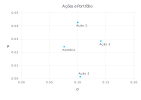

In [25]:
μ_example = [0.0427; 0.0015; 0.0285]
Σ_example = [0.0100 0.0018 0.0011; 0.0018 0.0109 0.0026; 0.0011 0.0026 0.0199]

grafico_ex(μ_example, Σ_example)

In [36]:
# grafico de parte da fronteira de portfolios
# necessario dar o range de retornos esperados μ_exps
function plot_cloud(μ_exps::Vector{Float64}, μ::Array{Float64,1}, Σ::Array{Float64,2})
    
    data = DataFrame(mean = Float64[], std = Float64[])
    n = size(Σ, 1)
    for μ_port in μ_exps
        A, b = create_model_subject_to_return(μ_port, μ, Σ)
        x = vector_port(A, b)
        m = x[1:n]
        μ_p, σ_p = portfolio_stats(m, μ, Σ)
        push!(data, [μ_p, σ_p])
    end
    
    plot(
        data, x = :std, y = :mean,
        Coord.cartesian(xmin=0, ymin=0),
        Guide.xlabel("σ_p"), Guide.ylabel("μ_p"),
        Guide.title("Nuvem dos portfólios"),
        Geom.point
    )

end

grafico (generic function with 1 method)

In [38]:
μ_exps = collect(0.01:0.001:0.06)

51-element Vector{Float64}:
 0.01
 0.011
 0.012
 0.013
 0.014
 0.015
 0.016
 0.017
 0.018
 0.019
 0.02
 0.021
 0.022
 ⋮
 0.049
 0.05
 0.051
 0.052
 0.053
 0.054
 0.055
 0.056
 0.057
 0.058
 0.059
 0.06

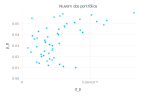

In [39]:
plot_cloud(μ_exps, μ, Σ)